<a href="https://colab.research.google.com/github/lizmtetwa/Data-Analytics-Portfolio-/blob/main/customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SQL Sales Analysis Project**

**Introduction**

This project analyzes a retail sales dataset across multiple regions to understand product performance, sales trends, and sales representative contributions. The dataset includes multiple tables, Customers, Orders, Products, and Sales Reps, which have been integrated into a SQL database for efficient querying. Using SQL within Python, the project demonstrates the extraction of actionable business insights and highlights patterns in product revenue, monthly sales, regional performance, and sales rep effectiveness.

**Objective**

Objective

The primary objective of this project is to demonstrate SQL querying skills while extracting meaningful business insights from a multi-table dataset. Specifically, the project aims to:

Identify top-performing products and regions based on revenue.

Analyze monthly sales trends and revenue volatility.

Evaluate sales rep performance, including total revenue, average order value, and monthly trends.

Showcase SQL capabilities for joins, aggregations, filtering, and data summarization within a Python workflow.

**Tools & Skills**

SQL (SQLite) - Querying, joins, aggregations, ranking, filtering

Python (pandas, matplotlib, seaborn) - Data loading, manipulation, visualization

Excel - Original dataset storage and verification

Data Analysis Techniques - Trend analysis, revenue aggregation, performance evaluation

Key SQL Queries
Product & Regional Analysis

Total Sales per Region

Top 5 Products by Revenue

Monthly Sales Trend

Products with No Sales

Sales Rep Analysis

Total Sales per Sales Rep

Average Order Value per Sales Rep

Monthly Sales Trend per Sales Rep

In [ ]:
import sqlite3
import pandas as pd

#1. connect to a new SQLite database (It will create a file)
conn = sqlite3.connect('my_database.db')

#load csv into python





In [ ]:
accounts_df = pd.read_csv('/content/accounts.csv')
display(accounts_df.head())

,id,name,website,lat,long,primary_poc,sales_rep_id
0,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
1,1011,Exxon Mobil,www.exxonmobil.com,41.169156,-73.849374,Sung Shields,321510
2,1021,Apple,www.apple.com,42.290495,-76.084009,Jodee Lupo,321520
3,1031,Berkshire Hathaway,www.berkshirehathaway.com,40.949021,-75.763898,Serafina Banda,321530
4,1041,McKesson,www.mckesson.com,42.217093,-75.284998,Angeles Crusoe,321540


In [ ]:
orders_df = pd.read_csv('/content/orders.csv')
display(orders_df.head())

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43
1,2,1001,2015-11-05 03:34:33,190,41,57,288,948.10,307.09,462.84,1718.03
2,3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0.00,776.18
3,4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0.00,958.24
4,5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49


In [ ]:
region_df = pd.read_csv('/content/region.csv')
display(region_df.head())

,id,name
0,1,Northeast
1,2,Midwest
2,3,Southeast
3,4,West


In [ ]:
sales_reps_df = pd.read_csv('/content/sales_reps.csv')
display(sales_reps_df.head())

,id,name,region_id
0,321500,Samuel Racine,1
1,321510,Eugena Esser,1
2,321520,Michel Averette,1
3,321530,Renetta Carew,1
4,321540,Cara Clarke,1


In [ ]:
web_events_df = pd.read_csv('/content/web_events.csv')
display(web_events_df.head())

,id,account_id,occurred_at,channel
0,1,1001,2015-10-06 17:13:58,direct
1,2,1001,2015-11-05 03:08:26,direct
2,3,1001,2015-12-04 03:57:24,direct
3,4,1001,2016-01-02 00:55:03,direct
4,5,1001,2016-02-01 19:02:33,direct


**Test a Simple Query**

In [ ]:
import pandas as pd
accounts = pd.read_csv('/content/accounts.csv')
orders = pd.read_csv('/content/orders.csv')
region = pd.read_csv('/content/region.csv')
sales_reps = pd.read_csv('/content/sales_reps.csv')
web_events = pd.read_csv('/content/web_events.csv')

#quick check
print(accounts.head())
print(orders.head())
print(sales_reps.head())
print(web_events.head())

     id                name                    website        lat       long  \
0  1001             Walmart            www.walmart.com  40.238496 -75.103297   
1  1011         Exxon Mobil         www.exxonmobil.com  41.169156 -73.849374   
2  1021               Apple              www.apple.com  42.290495 -76.084009   
3  1031  Berkshire Hathaway  www.berkshirehathaway.com  40.949021 -75.763898   
4  1041            McKesson           www.mckesson.com  42.217093 -75.284998   

      primary_poc  sales_rep_id  
0     Tamara Tuma        321500  
1    Sung Shields        321510  
2      Jodee Lupo        321520  
3  Serafina Banda        321530  
4  Angeles Crusoe        321540  
   id  account_id          occurred_at  standard_qty  gloss_qty  poster_qty  \
0   1        1001  2015-10-06 17:31:14           123         22          24   
1   2        1001  2015-11-05 03:34:33           190         41          57   
2   3        1001  2015-12-04 04:21:55            85         47           0   

In [ ]:
import pandas as pd
# Example:view first 10
query = "SELECT * FROM Orders LIMIT 10;"

print(orders)

        id  account_id          occurred_at  standard_qty  gloss_qty  \
0        1        1001  2015-10-06 17:31:14           123         22   
1        2        1001  2015-11-05 03:34:33           190         41   
2        3        1001  2015-12-04 04:21:55            85         47   
3        4        1001  2016-01-02 01:18:24           144         32   
4        5        1001  2016-02-01 19:27:27           108         29   
...    ...         ...                  ...           ...        ...   
4045  4046        4271  2016-10-22 09:11:35           446          0   
4046  4047        4271  2016-11-20 06:10:00           298         21   
4047  4048        4271  2016-12-20 20:28:46           272         21   
4048  4049        4281  2016-01-04 12:29:17           286          0   
4049  4050        4281  2016-02-02 07:42:36           304        153   

      poster_qty  total  standard_amt_usd  gloss_amt_usd  poster_amt_usd  \
0             24    169            613.77         164.78   

**Run Portfolio-Worthy Queries**

In [ ]:
# Write pandas DataFrames to SQLite database
accounts.to_sql('accounts', conn, if_exists='replace', index=False)
orders.to_sql('orders', conn, if_exists='replace', index=False)
sales_reps.to_sql('sales_reps', conn, if_exists='replace', index=False)
region.to_sql('region', conn, if_exists='replace', index=False)

query = """
SELECT
    r.name AS Region,
    SUM(o.total_amt_usd) AS "Total Sales"
FROM
    orders o
JOIN
    accounts a ON o.account_id = a.id
JOIN
    sales_reps sr ON a.sales_rep_id = sr.id
JOIN
    region r ON sr.region_id = r.id
GROUP BY
    r.name
ORDER BY
    "Total Sales" DESC;
"""
result=pd.read_sql(query,conn)
print(result)

      Region  Total Sales
0  Northeast   3599720.49
1  Southeast   2990085.38
2       West   2475454.68
3    Midwest   1363691.93


In [ ]:
query = """
SELECT
    SUM(standard_amt_usd) AS Standard_Product_Revenue,
    SUM(gloss_amt_usd) AS Gloss_Product_Revenue,
    SUM(poster_amt_usd) AS Poster_Product_Revenue
FROM
    orders;
"""

product_revenue = pd.read_sql(query, conn)

# Reshape the result to easily sort and display top products
top_products_by_revenue = product_revenue.iloc[0].sort_values(ascending=False)

print("Top Products by Revenue:")
print(top_products_by_revenue)


Top Products by Revenue:
Standard_Product_Revenue    7604146.23
Poster_Product_Revenue      1587630.52
Gloss_Product_Revenue       1237175.73
Name: 0, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'occurred_at' is datetime
orders['occurred_at'] = pd.to_datetime(orders['occurred_at'])

# Extract Year-Month for grouping
orders['year_month'] = orders['occurred_at'].dt.to_period('M')

# Calculate monthly sales for each product type
monthly_product_sales = orders.groupby('year_month')[['standard_amt_usd', 'gloss_amt_usd', 'poster_amt_usd']].sum().reset_index()

# Melt the DataFrame for easier plotting (product type as a category)
monthly_product_sales_melted = monthly_product_sales.melt(
    id_vars='year_month',
    var_name='Product Type',
    value_name='Total Sales'
)

# Convert 'year_month' back to datetime for proper sorting and plotting
monthly_product_sales_melted['year_month'] = monthly_product_sales_melted['year_month'].dt.to_timestamp()

print("Monthly Product Sales Data:")
display(monthly_product_sales_melted.head())


Monthly Product Sales Data:


,year_month,Product Type,Total Sales
0,2013-12-01,standard_amt_usd,95368.88
1,2014-01-01,standard_amt_usd,105638.30
2,2014-02-01,standard_amt_usd,109305.95
3,2014-03-01,standard_amt_usd,100952.69
4,2014-04-01,standard_amt_usd,108851.86


In [ ]:
# Identify products with no sales in specific months
no_sales_products = monthly_product_sales_melted[monthly_product_sales_melted['Total Sales'] == 0]

if not no_sales_products.empty:
    print("Months with no sales for specific products:")
    print(no_sales_products)
else:
    print("All product types had sales in every recorded month.")


All product types had sales in every recorded month.


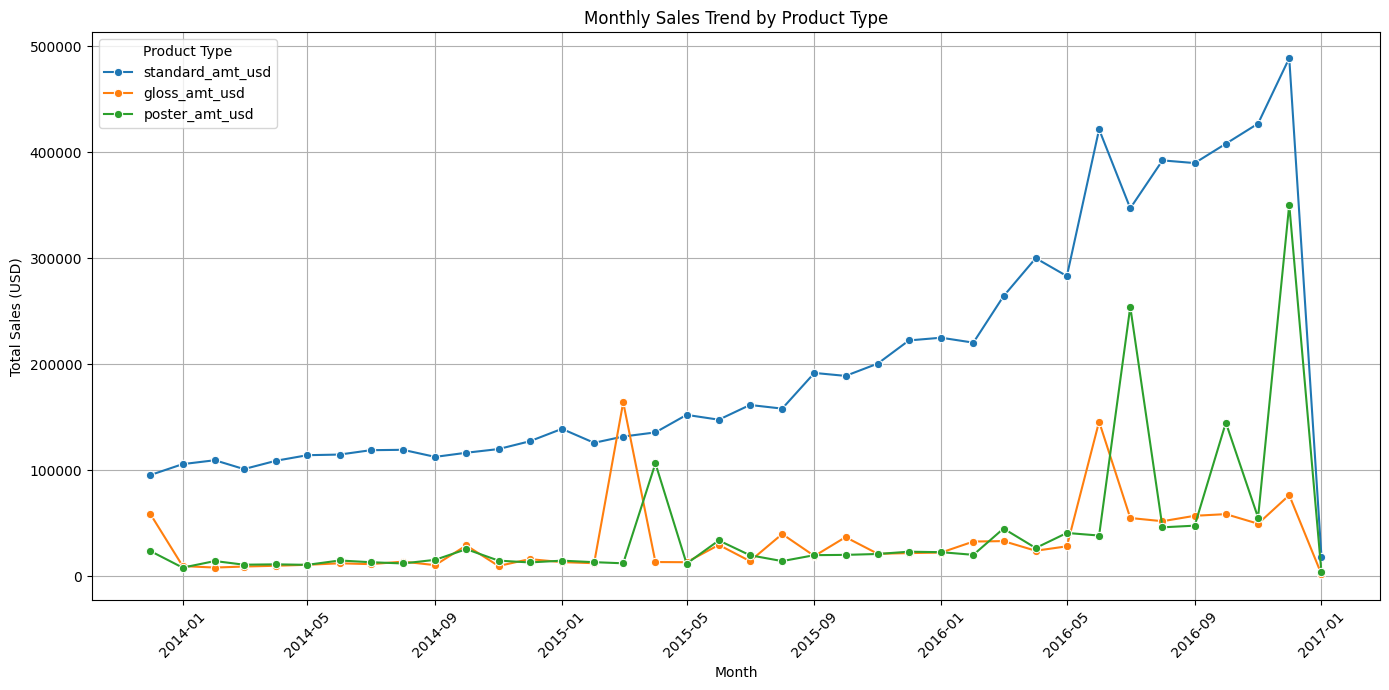

In [ ]:
# Plot the monthly sales trend for each product type
plt.figure(figsize=(14, 7))
sns.lineplot(
x='year_month',
y='Total Sales',
hue='Product Type',
data=monthly_product_sales_melted,
marker='o'
)
plt.title('Monthly Sales Trend by Product Type')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
query_sales_rep_performance = """
SELECT
    r.name AS Region,
    sr.name AS Sales_Rep,
    SUM(o.total_amt_usd) AS Total_Sales
FROM
    orders o
JOIN
    accounts a ON o.account_id = a.id
JOIN
    sales_reps sr ON a.sales_rep_id = sr.id
JOIN
    region r ON sr.region_id = r.id
GROUP BY
    r.name, sr.name
ORDER BY
    Total_Sales DESC;
"""
sales_rep_performance = pd.read_sql(query_sales_rep_performance, conn)
print(sales_rep_performance.head())

      Region          Sales_Rep  Total_Sales
0  Southeast  Earlie Schleusner    506470.92
1  Southeast        Moon Torian    474372.08
2  Southeast      Vernita Plump    472044.16
3  Northeast          Tia Amato    466213.64
4       West        Dawna Agnew    410948.92


/tmp/ipython-input-204654999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total Sales', data=result, palette='viridis')


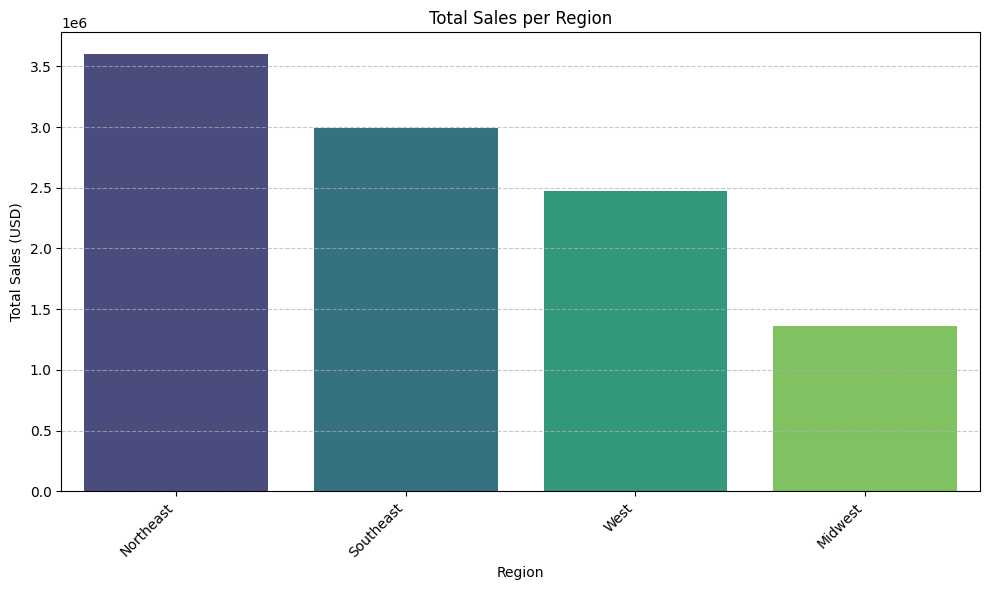

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for total sales per region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Sales', data=result, palette='viridis')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
display(sales_rep_performance)

,Region,Sales_Rep,Total_Sales
0,Southeast,Earlie Schleusner,506470.92
1,Southeast,Moon Torian,474372.08
2,Southeast,Vernita Plump,472044.16
3,Northeast,Tia Amato,466213.64
4,West,Dawna Agnew,410948.92
5,West,Maryanna Fiorentino,363890.51
6,Southeast,Nelle Meaux,359779.88
7,West,Elwood Shutt,346698.05
8,Midwest,Delilah Krum,315747.89
9,Midwest,Charles Bidwell,306753.04


In [ ]:
top_5_sales_reps = sales_rep_performance.head(5)
print("Top 5 Sales Representatives Overall:")
print(top_5_sales_reps)

Top 5 Sales Representatives Overall:
      Region          Sales_Rep  Total_Sales
0  Southeast  Earlie Schleusner    506470.92
1  Southeast        Moon Torian    474372.08
2  Southeast      Vernita Plump    472044.16
3  Northeast          Tia Amato    466213.64
4       West        Dawna Agnew    410948.92


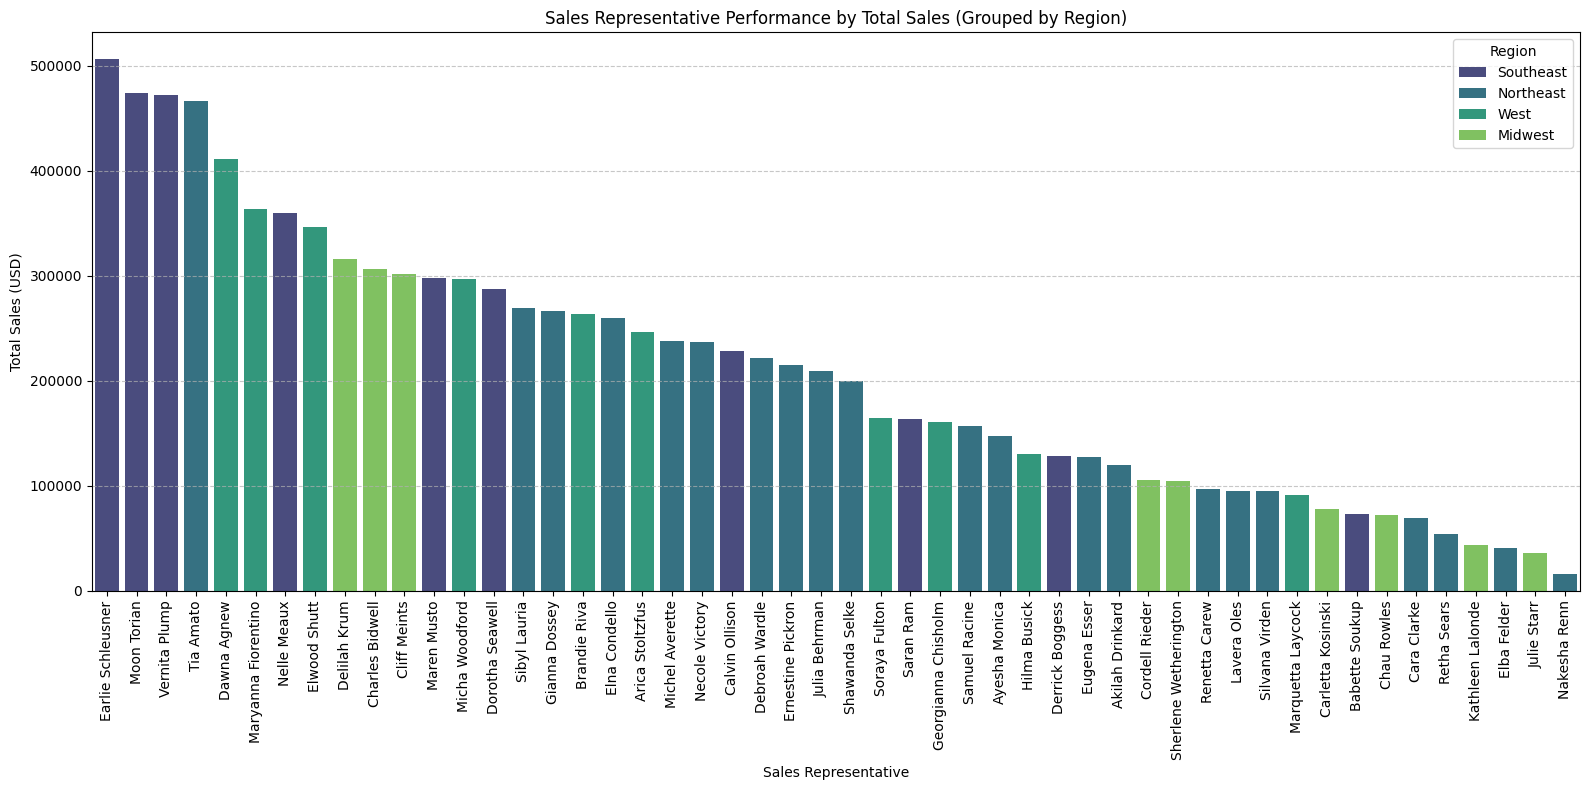

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data for better visualization
sales_rep_performance_sorted = sales_rep_performance.sort_values(by='Total_Sales', ascending=False)

# Visualize sales representative performance
plt.figure(figsize=(16, 8))
sns.barplot(x='Sales_Rep', y='Total_Sales', hue='Region', data=sales_rep_performance_sorted, palette='viridis', dodge=False)
plt.title('Sales Representative Performance by Total Sales (Grouped by Region)')
plt.xlabel('Sales Representative')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Key Insights & Limitations**

**Key Insights:**
Analysis of the sales dataset shows that Standard products consistently generate the highest revenue, with steady growth from 2014 to 2016. In contrast, ‘Gloss’ and ‘Poster’ products display more volatile sales, with occasional spikes, suggesting opportunities for targeted marketing or external factors affecting demand. All product types recorded sales every month, indicating continuous demand, and regionally, the Northeast leads in total sales, followed by the Southeast, while the Midwest shows the lowest performance.

**Limitations:**
The analysis has several constraints. Product data is only available at a high-level category, with no SKUs, limiting detailed product performance insights. Profit, cost, and margin information is missing, so true profitability cannot be determined. Customer segmentation and behavior were not explored, reducing understanding of who is purchasing which products. Web event data was loaded but not integrated, and external context like marketing campaigns, pricing strategies, competitor activity, or economic factors is unavailable. Finally, the dataset spans roughly three years, which may be insufficient for long-term strategic planning or confirming seasonal patterns, especially for the more volatile products.